## US Honey Production Sales Inventory

In [1]:
# https://www.nass.usda.gov/Surveys/Guide_to_NASS_Surveys/Bee_and_Honey/
# [DEFAULT]
# URL=https://quickstats.nass.usda.gov/results/4BA979D9-B1E3-39E7-AE96-4C6B0743ED2C
# [InternetShortcut]
# URL=https://quickstats.nass.usda.gov/results/4BA979D9-B1E3-39E7-AE96-4C6B0743ED2C

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
# read the dataset
dfps = pd.read_csv(r"C:\Data Science\IIT Jammu\IIT M Advanced DS & AI\Python\US_honey_dataset_production_sales.csv", skipinitialspace = True)
dfin = pd.read_csv(r"C:\Data Science\IIT Jammu\IIT M Advanced DS & AI\Python\US_honey_dataset_inventory.csv", skipinitialspace = True)

df = dfps.append(dfin, ignore_index = True)
df.head()

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (7,9,12,20) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,Program,Year,Period,Week Ending,Geo Level,State,State ANSI,Ag District,Ag District Code,County,...,Zip Code,Region,watershed_code,Watershed,Commodity,Data Item,Domain,Domain Category,Value,CV (%)
0,CENSUS,2018,YEAR,NaN,PUERTO RICO & OUTLYING AREAS,PUERTO RICO,72.0,NaN,NaN,NaN,...,NaN,PUERTO RICO,0,NaN,HONEY,HONEY - OPERATIONS WITH SALES,AREA OPERATED,AREA OPERATED: (10 TO 19 CUERDAS),29,92.0
1,CENSUS,2018,YEAR,NaN,PUERTO RICO & OUTLYING AREAS,PUERTO RICO,72.0,NaN,NaN,NaN,...,NaN,PUERTO RICO,0,NaN,HONEY,HONEY - OPERATIONS WITH SALES,AREA OPERATED,AREA OPERATED: (100 TO 174 CUERDAS),2,(H)
2,CENSUS,2018,YEAR,NaN,PUERTO RICO & OUTLYING AREAS,PUERTO RICO,72.0,NaN,NaN,NaN,...,NaN,PUERTO RICO,0,NaN,HONEY,HONEY - OPERATIONS WITH SALES,AREA OPERATED,AREA OPERATED: (20 TO 49 CUERDAS),16,(H)
3,CENSUS,2018,YEAR,NaN,PUERTO RICO & OUTLYING AREAS,PUERTO RICO,72.0,NaN,NaN,NaN,...,NaN,PUERTO RICO,0,NaN,HONEY,HONEY - OPERATIONS WITH SALES,AREA OPERATED,AREA OPERATED: (260 OR MORE CUERDAS),1,(L)
4,CENSUS,2018,YEAR,NaN,PUERTO RICO & OUTLYING AREAS,PUERTO RICO,72.0,NaN,NaN,NaN,...,NaN,PUERTO RICO,0,NaN,HONEY,HONEY - OPERATIONS WITH SALES,AREA OPERATED,AREA OPERATED: (50 TO 99 CUERDAS),8,(H)


In [6]:
df.shape

(54753, 21)

In [7]:
df.describe()

,Year,Week Ending,State ANSI,Ag District Code,County ANSI,Zip Code,watershed_code,Watershed
count,54753.000000,0.0,54723.000000,53088.000000,53026.000000,0.0,54753.0,0.0
mean,2010.498530,NaN,30.396360,48.250339,91.821107,NaN,0.0,NaN
std,5.560826,NaN,15.160563,25.660530,82.562146,NaN,0.0,NaN
min,1997.000000,NaN,1.000000,10.000000,1.000000,NaN,0.0,NaN
25%,2007.000000,NaN,19.000000,30.000000,33.000000,NaN,0.0,NaN
50%,2012.000000,NaN,29.000000,50.000000,75.000000,NaN,0.0,NaN
75%,2017.000000,NaN,45.000000,70.000000,125.000000,NaN,0.0,NaN
max,2018.000000,NaN,72.000000,97.000000,810.000000,NaN,0.0,NaN


### Exploratory Data Analysis (EDA)

In [8]:
# df = df.drop(columns=["Unnamed: 0"])

In [9]:
df

,Program,Year,Period,Week Ending,Geo Level,State,State ANSI,Ag District,Ag District Code,County,...,Zip Code,Region,watershed_code,Watershed,Commodity,Data Item,Domain,Domain Category,Value,CV (%)
0,CENSUS,2018,YEAR,NaN,PUERTO RICO & OUTLYING AREAS,PUERTO RICO,72.0,NaN,NaN,NaN,...,NaN,PUERTO RICO,0,NaN,HONEY,HONEY - OPERATIONS WITH SALES,AREA OPERATED,AREA OPERATED: (10 TO 19 CUERDAS),29,92.0
1,CENSUS,2018,YEAR,NaN,PUERTO RICO & OUTLYING AREAS,PUERTO RICO,72.0,NaN,NaN,NaN,...,NaN,PUERTO RICO,0,NaN,HONEY,HONEY - OPERATIONS WITH SALES,AREA OPERATED,AREA OPERATED: (100 TO 174 CUERDAS),2,(H)
2,CENSUS,2018,YEAR,NaN,PUERTO RICO & OUTLYING AREAS,PUERTO RICO,72.0,NaN,NaN,NaN,...,NaN,PUERTO RICO,0,NaN,HONEY,HONEY - OPERATIONS WITH SALES,AREA OPERATED,AREA OPERATED: (20 TO 49 CUERDAS),16,(H)
3,CENSUS,2018,YEAR,NaN,PUERTO RICO & OUTLYING AREAS,PUERTO RICO,72.0,NaN,NaN,NaN,...,NaN,PUERTO RICO,0,NaN,HONEY,HONEY - OPERATIONS WITH SALES,AREA OPERATED,AREA OPERATED: (260 OR MORE CUERDAS),1,(L)
4,CENSUS,2018,YEAR,NaN,PUERTO RICO & OUTLYING AREAS,PUERTO RICO,72.0,NaN,NaN,NaN,...,NaN,PUERTO RICO,0,NaN,HONEY,HONEY - OPERATIONS WITH SALES,AREA OPERATED,AREA OPERATED: (50 TO 99 CUERDAS),8,(H)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54748,CENSUS,1997,END OF DEC,NaN,STATE,WEST VIRGINIA,54.0,NaN,NaN,NaN,...,NaN,NaN,0,NaN,HONEY,"HONEY, BEE COLONIES - OPERATIONS WITH INVENTORY",TOTAL,NOT SPECIFIED,412,NaN
54749,CENSUS,1997,END OF DEC,NaN,STATE,WISCONSIN,55.0,NaN,NaN,NaN,...,NaN,NaN,0,NaN,HONEY,"HONEY, BEE COLONIES - INVENTORY, MEASURED IN C...",TOTAL,NOT SPECIFIED,"69,893",NaN
54750,CENSUS,1997,END OF DEC,NaN,STATE,WISCONSIN,55.0,NaN,NaN,NaN,...,NaN,NaN,0,NaN,HONEY,"HONEY, BEE COLONIES - OPERATIONS WITH INVENTORY",TOTAL,NOT SPECIFIED,776,NaN
54751,CENSUS,1997,END OF DEC,NaN,STATE,WYOMING,56.0,NaN,NaN,NaN,...,NaN,NaN,0,NaN,HONEY,"HONEY, BEE COLONIES - INVENTORY, MEASURED IN C...",TOTAL,NOT SPECIFIED,"32,569",NaN


In [10]:
df.head(10)

,Program,Year,Period,Week Ending,Geo Level,State,State ANSI,Ag District,Ag District Code,County,...,Zip Code,Region,watershed_code,Watershed,Commodity,Data Item,Domain,Domain Category,Value,CV (%)
0,CENSUS,2018,YEAR,NaN,PUERTO RICO & OUTLYING AREAS,PUERTO RICO,72.0,NaN,NaN,NaN,...,NaN,PUERTO RICO,0,NaN,HONEY,HONEY - OPERATIONS WITH SALES,AREA OPERATED,AREA OPERATED: (10 TO 19 CUERDAS),29,92.0
1,CENSUS,2018,YEAR,NaN,PUERTO RICO & OUTLYING AREAS,PUERTO RICO,72.0,NaN,NaN,NaN,...,NaN,PUERTO RICO,0,NaN,HONEY,HONEY - OPERATIONS WITH SALES,AREA OPERATED,AREA OPERATED: (100 TO 174 CUERDAS),2,(H)
2,CENSUS,2018,YEAR,NaN,PUERTO RICO & OUTLYING AREAS,PUERTO RICO,72.0,NaN,NaN,NaN,...,NaN,PUERTO RICO,0,NaN,HONEY,HONEY - OPERATIONS WITH SALES,AREA OPERATED,AREA OPERATED: (20 TO 49 CUERDAS),16,(H)
3,CENSUS,2018,YEAR,NaN,PUERTO RICO & OUTLYING AREAS,PUERTO RICO,72.0,NaN,NaN,NaN,...,NaN,PUERTO RICO,0,NaN,HONEY,HONEY - OPERATIONS WITH SALES,AREA OPERATED,AREA OPERATED: (260 OR MORE CUERDAS),1,(L)
4,CENSUS,2018,YEAR,NaN,PUERTO RICO & OUTLYING AREAS,PUERTO RICO,72.0,NaN,NaN,NaN,...,NaN,PUERTO RICO,0,NaN,HONEY,HONEY - OPERATIONS WITH SALES,AREA OPERATED,AREA OPERATED: (50 TO 99 CUERDAS),8,(H)
5,CENSUS,2018,YEAR,NaN,PUERTO RICO & OUTLYING AREAS,PUERTO RICO,72.0,NaN,NaN,NaN,...,NaN,PUERTO RICO,0,NaN,HONEY,HONEY - OPERATIONS WITH SALES,AREA OPERATED,AREA OPERATED: (LESS THAN 10 CUERDAS),76,58.7
6,CENSUS,2018,YEAR,NaN,PUERTO RICO & OUTLYING AREAS,PUERTO RICO,72.0,NaN,NaN,NaN,...,NaN,PUERTO RICO,0,NaN,HONEY,HONEY - OPERATIONS WITH SALES,FARM SALES,"FARM SALES: (1,000 TO 2,499 $)",21,(H)
7,CENSUS,2018,YEAR,NaN,PUERTO RICO & OUTLYING AREAS,PUERTO RICO,72.0,NaN,NaN,NaN,...,NaN,PUERTO RICO,0,NaN,HONEY,HONEY - OPERATIONS WITH SALES,FARM SALES,"FARM SALES: (10,000 TO 19,999 $)",20,(H)
8,CENSUS,2018,YEAR,NaN,PUERTO RICO & OUTLYING AREAS,PUERTO RICO,72.0,NaN,NaN,NaN,...,NaN,PUERTO RICO,0,NaN,HONEY,HONEY - OPERATIONS WITH SALES,FARM SALES,"FARM SALES: (2,500 TO 4,999 $)",22,56.0
9,CENSUS,2018,YEAR,NaN,PUERTO RICO & OUTLYING AREAS,PUERTO RICO,72.0,NaN,NaN,NaN,...,NaN,PUERTO RICO,0,NaN,HONEY,HONEY - OPERATIONS WITH SALES,FARM SALES,"FARM SALES: (25,000 TO 29,999 $)",6,(H)


In [11]:
df.tail(10)

,Program,Year,Period,Week Ending,Geo Level,State,State ANSI,Ag District,Ag District Code,County,...,Zip Code,Region,watershed_code,Watershed,Commodity,Data Item,Domain,Domain Category,Value,CV (%)
54743,CENSUS,1997,END OF DEC,NaN,STATE,VIRGINIA,51.0,NaN,NaN,NaN,...,NaN,NaN,0,NaN,HONEY,"HONEY, BEE COLONIES - INVENTORY, MEASURED IN C...",TOTAL,NOT SPECIFIED,"10,841",NaN
54744,CENSUS,1997,END OF DEC,NaN,STATE,VIRGINIA,51.0,NaN,NaN,NaN,...,NaN,NaN,0,NaN,HONEY,"HONEY, BEE COLONIES - OPERATIONS WITH INVENTORY",TOTAL,NOT SPECIFIED,630,NaN
54745,CENSUS,1997,END OF DEC,NaN,STATE,WASHINGTON,53.0,NaN,NaN,NaN,...,NaN,NaN,0,NaN,HONEY,"HONEY, BEE COLONIES - INVENTORY, MEASURED IN C...",TOTAL,NOT SPECIFIED,"80,201",NaN
54746,CENSUS,1997,END OF DEC,NaN,STATE,WASHINGTON,53.0,NaN,NaN,NaN,...,NaN,NaN,0,NaN,HONEY,"HONEY, BEE COLONIES - OPERATIONS WITH INVENTORY",TOTAL,NOT SPECIFIED,666,NaN
54747,CENSUS,1997,END OF DEC,NaN,STATE,WEST VIRGINIA,54.0,NaN,NaN,NaN,...,NaN,NaN,0,NaN,HONEY,"HONEY, BEE COLONIES - INVENTORY, MEASURED IN C...",TOTAL,NOT SPECIFIED,"6,231",NaN
54748,CENSUS,1997,END OF DEC,NaN,STATE,WEST VIRGINIA,54.0,NaN,NaN,NaN,...,NaN,NaN,0,NaN,HONEY,"HONEY, BEE COLONIES - OPERATIONS WITH INVENTORY",TOTAL,NOT SPECIFIED,412,NaN
54749,CENSUS,1997,END OF DEC,NaN,STATE,WISCONSIN,55.0,NaN,NaN,NaN,...,NaN,NaN,0,NaN,HONEY,"HONEY, BEE COLONIES - INVENTORY, MEASURED IN C...",TOTAL,NOT SPECIFIED,"69,893",NaN
54750,CENSUS,1997,END OF DEC,NaN,STATE,WISCONSIN,55.0,NaN,NaN,NaN,...,NaN,NaN,0,NaN,HONEY,"HONEY, BEE COLONIES - OPERATIONS WITH INVENTORY",TOTAL,NOT SPECIFIED,776,NaN
54751,CENSUS,1997,END OF DEC,NaN,STATE,WYOMING,56.0,NaN,NaN,NaN,...,NaN,NaN,0,NaN,HONEY,"HONEY, BEE COLONIES - INVENTORY, MEASURED IN C...",TOTAL,NOT SPECIFIED,"32,569",NaN
54752,CENSUS,1997,END OF DEC,NaN,STATE,WYOMING,56.0,NaN,NaN,NaN,...,NaN,NaN,0,NaN,HONEY,"HONEY, BEE COLONIES - OPERATIONS WITH INVENTORY",TOTAL,NOT SPECIFIED,164,NaN


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54753 entries, 0 to 54752
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Program           54753 non-null  object 
 1   Year              54753 non-null  int64  
 2   Period            54753 non-null  object 
 3   Week Ending       0 non-null      float64
 4   Geo Level         54753 non-null  object 
 5   State             54753 non-null  object 
 6   State ANSI        54723 non-null  float64
 7   Ag District       53088 non-null  object 
 8   Ag District Code  53088 non-null  float64
 9   County            53088 non-null  object 
 10  County ANSI       53026 non-null  float64
 11  Zip Code          0 non-null      float64
 12  Region            145 non-null    object 
 13  watershed_code    54753 non-null  int64  
 14  Watershed         0 non-null      float64
 15  Commodity         54753 non-null  object 
 16  Data Item         54753 non-null  object

In [13]:
df.describe()

,Year,Week Ending,State ANSI,Ag District Code,County ANSI,Zip Code,watershed_code,Watershed
count,54753.000000,0.0,54723.000000,53088.000000,53026.000000,0.0,54753.0,0.0
mean,2010.498530,NaN,30.396360,48.250339,91.821107,NaN,0.0,NaN
std,5.560826,NaN,15.160563,25.660530,82.562146,NaN,0.0,NaN
min,1997.000000,NaN,1.000000,10.000000,1.000000,NaN,0.0,NaN
25%,2007.000000,NaN,19.000000,30.000000,33.000000,NaN,0.0,NaN
50%,2012.000000,NaN,29.000000,50.000000,75.000000,NaN,0.0,NaN
75%,2017.000000,NaN,45.000000,70.000000,125.000000,NaN,0.0,NaN
max,2018.000000,NaN,72.000000,97.000000,810.000000,NaN,0.0,NaN


In [15]:
df["State"].unique()

array(['PUERTO RICO', 'ALABAMA', 'ALASKA', 'ARIZONA', 'ARKANSAS',
       'CALIFORNIA', 'COLORADO', 'CONNECTICUT', 'DELAWARE', 'FLORIDA',
       'GEORGIA', 'HAWAII', 'IDAHO', 'ILLINOIS', 'INDIANA', 'IOWA',
       'KANSAS', 'KENTUCKY', 'LOUISIANA', 'MAINE', 'MARYLAND',
       'MASSACHUSETTS', 'MICHIGAN', 'MINNESOTA', 'MISSISSIPPI',
       'MISSOURI', 'MONTANA', 'NEBRASKA', 'NEVADA', 'NEW HAMPSHIRE',
       'NEW JERSEY', 'NEW MEXICO', 'NEW YORK', 'NORTH CAROLINA',
       'NORTH DAKOTA', 'OHIO', 'OKLAHOMA', 'OREGON', 'PENNSYLVANIA',
       'RHODE ISLAND', 'SOUTH CAROLINA', 'SOUTH DAKOTA', 'TENNESSEE',
       'TEXAS', 'UTAH', 'VERMONT', 'VIRGINIA', 'WASHINGTON',
       'WEST VIRGINIA', 'WISCONSIN', 'WYOMING', 'US TOTAL'], dtype=object)

In [16]:
len(df["State"].unique())

52

In [17]:
# checking the null values
df.isnull().sum()

Program                 0
Year                    0
Period                  0
Week Ending         54753
Geo Level               0
State                   0
State ANSI             30
Ag District          1665
Ag District Code     1665
County               1665
County ANSI          1727
Zip Code            54753
Region              54608
watershed_code          0
Watershed           54753
Commodity               0
Data Item               0
Domain                  0
Domain Category         0
Value                   0
CV (%)              22156
dtype: int64

In [29]:
# if null values:
#    drop
#    replace:
#        numerical: replace by either mean or median
#            object: replace with mode

In [18]:
# checking the duplicate values
df.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
54748    False
54749    False
54750    False
54751    False
54752    False
Length: 54753, dtype: bool

In [19]:
df.duplicated().sum()

0

In [37]:
# in case duplicates are there:
#     df.drop_duplicate()

In [38]:
# outlist analysis

In [20]:
df.columns

Index(['Program', 'Year', 'Period', 'Week Ending', 'Geo Level', 'State',
       'State ANSI', 'Ag District', 'Ag District Code', 'County',
       'County ANSI', 'Zip Code', 'Region', 'watershed_code', 'Watershed',
       'Commodity', 'Data Item', 'Domain', 'Domain Category', 'Value',
       'CV (%)'],
      dtype='object')

{'whiskers': [<matplotlib.lines.Line2D at 0x20c3f8d3250>,
 'caps': [<matplotlib.lines.Line2D at 0x20c3f8d3910>,
 'boxes': [<matplotlib.lines.Line2D at 0x20c3f8c3eb0>],
 'medians': [<matplotlib.lines.Line2D at 0x20c3f8d3fd0>],
 'fliers': [<matplotlib.lines.Line2D at 0x20c3f8de370>],
 'means': []}

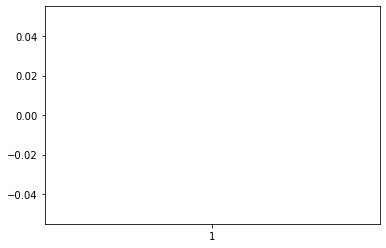

In [32]:
plt.boxplot(df["Watershed"])

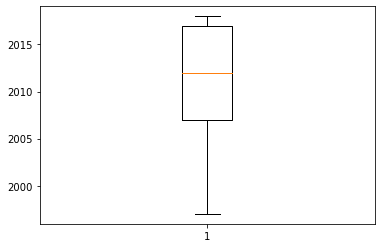

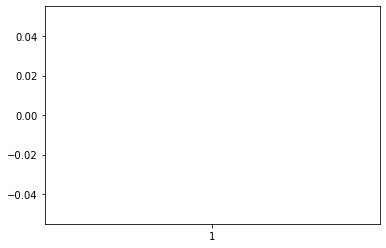

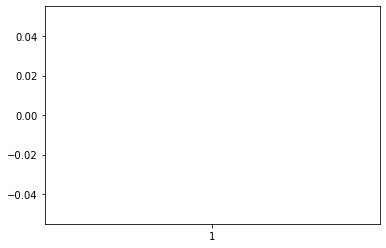

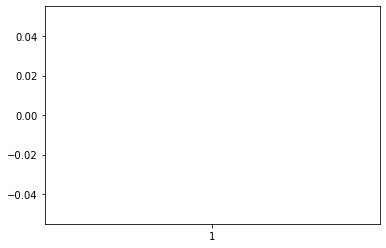

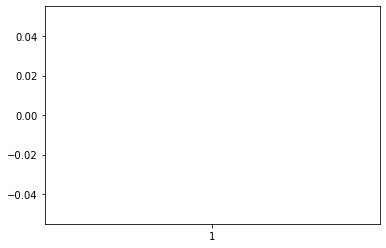

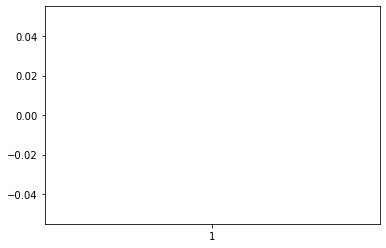

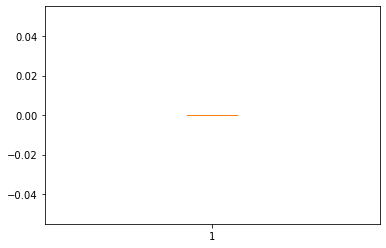

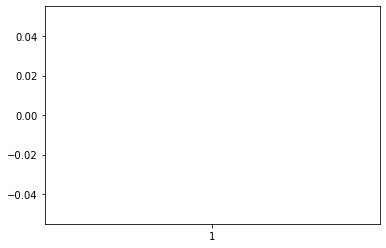

In [23]:
for col in df.columns:
    if df[col].dtype != "object":
        plt.boxplot(df[col])
        plt.show()

In [43]:
# as the data is very less thus we should ignore the outliers as if we remove the outlies there will be huge data lose

### Analysing the inferences from the data

### which states are rarely contributing for honey productoion since last 27 years

In [24]:
df["State"].value_counts()

TEXAS             3364
GEORGIA           2478
KENTUCKY          2292
MISSOURI          2202
NORTH CAROLINA    1952
TENNESSEE         1908
OHIO              1890
VIRGINIA          1878
IOWA              1858
ILLINOIS          1808
INDIANA           1730
MICHIGAN          1670
MINNESOTA         1650
WISCONSIN         1458
PENNSYLVANIA      1420
FLORIDA           1396
ARKANSAS          1310
ALABAMA           1290
KANSAS            1288
MISSISSIPPI       1258
OKLAHOMA          1228
NEBRASKA          1206
NEW YORK          1202
CALIFORNIA        1196
WEST VIRGINIA     1134
LOUISIANA          998
SOUTH DAKOTA       982
COLORADO           918
SOUTH CAROLINA     890
MONTANA            868
NORTH DAKOTA       842
WASHINGTON         816
IDAHO              756
OREGON             692
UTAH               520
NEW MEXICO         506
MARYLAND           500
NEW JERSEY         436
WYOMING            386
MAINE              374
VERMONT            322
ARIZONA            304
MASSACHUSETTS      298
NEVADA     

In [25]:
state = df["State"].value_counts()

In [26]:
state.index

Index(['TEXAS', 'GEORGIA', 'KENTUCKY', 'MISSOURI', 'NORTH CAROLINA',
       'TENNESSEE', 'OHIO', 'VIRGINIA', 'IOWA', 'ILLINOIS', 'INDIANA',
       'MICHIGAN', 'MINNESOTA', 'WISCONSIN', 'PENNSYLVANIA', 'FLORIDA',
       'ARKANSAS', 'ALABAMA', 'KANSAS', 'MISSISSIPPI', 'OKLAHOMA', 'NEBRASKA',
       'NEW YORK', 'CALIFORNIA', 'WEST VIRGINIA', 'LOUISIANA', 'SOUTH DAKOTA',
       'COLORADO', 'SOUTH CAROLINA', 'MONTANA', 'NORTH DAKOTA', 'WASHINGTON',
       'IDAHO', 'OREGON', 'UTAH', 'NEW MEXICO', 'MARYLAND', 'NEW JERSEY',
       'WYOMING', 'MAINE', 'VERMONT', 'ARIZONA', 'MASSACHUSETTS', 'NEVADA',
       'NEW HAMPSHIRE', 'CONNECTICUT', 'PUERTO RICO', 'RHODE ISLAND', 'HAWAII',
       'ALASKA', 'DELAWARE', 'US TOTAL'],
      dtype='object')

In [27]:
state.values

array([3364, 2478, 2292, 2202, 1952, 1908, 1890, 1878, 1858, 1808, 1730,
       1670, 1650, 1458, 1420, 1396, 1310, 1290, 1288, 1258, 1228, 1206,
       1202, 1196, 1134,  998,  982,  918,  890,  868,  842,  816,  756,
        692,  520,  506,  500,  436,  386,  374,  322,  304,  298,  242,
        242,  204,  145,  126,  114,   90,   86,   30], dtype=int64)

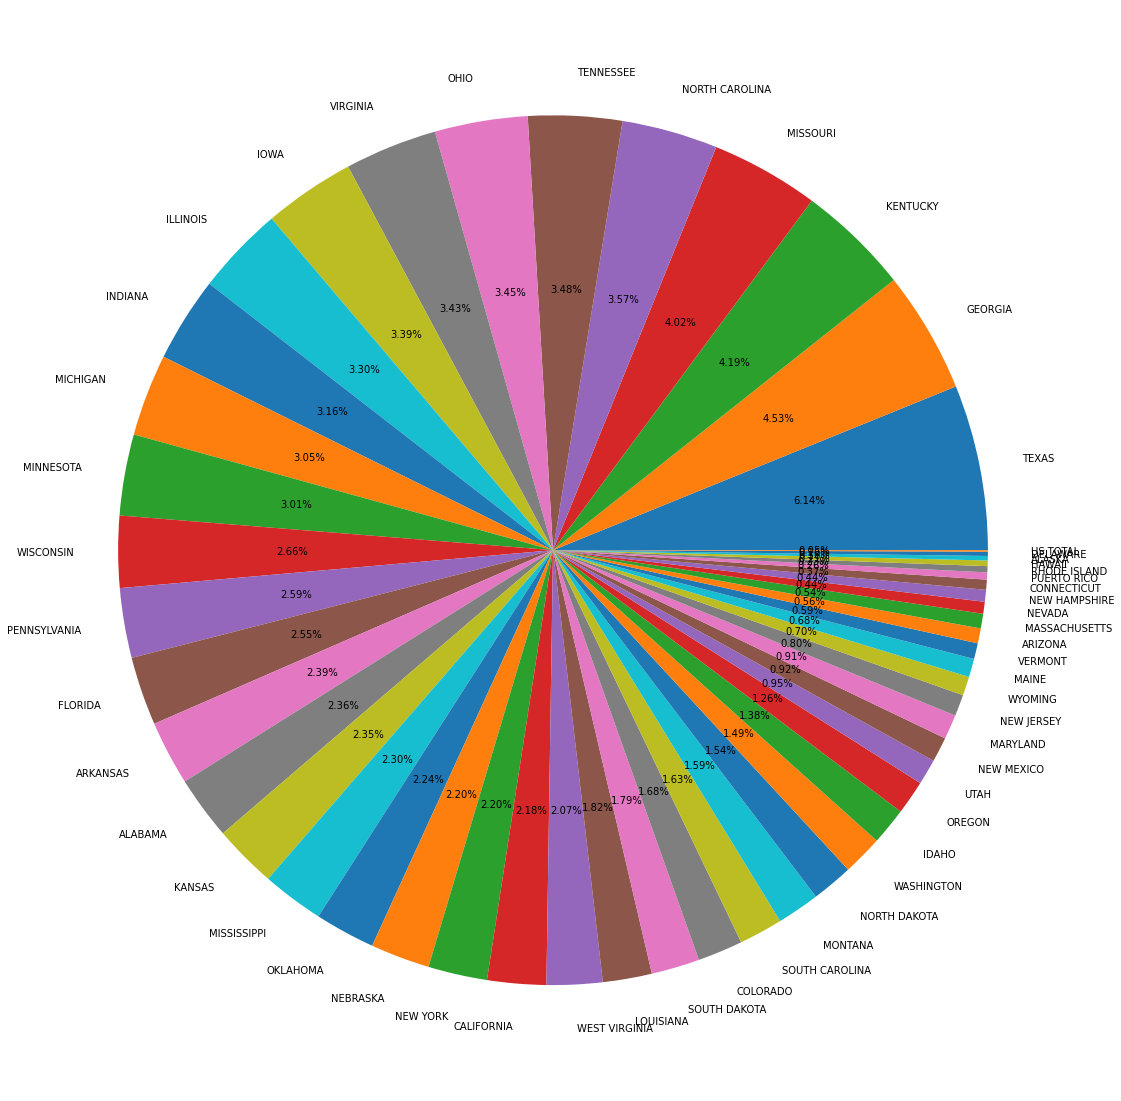

In [28]:
plt.figure(figsize = (20, 20))
plt.pie(state.values, labels = state.index, autopct='%1.2f%%')
plt.show()

In [45]:
# inference: top 5 states contributing less in last 27 years are:
# Oklahoma          9
# Maryland          9
# SouthCarolina    12
# Nevada           15
# NewMexico        18

### which are the top 5 honey producing state?

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


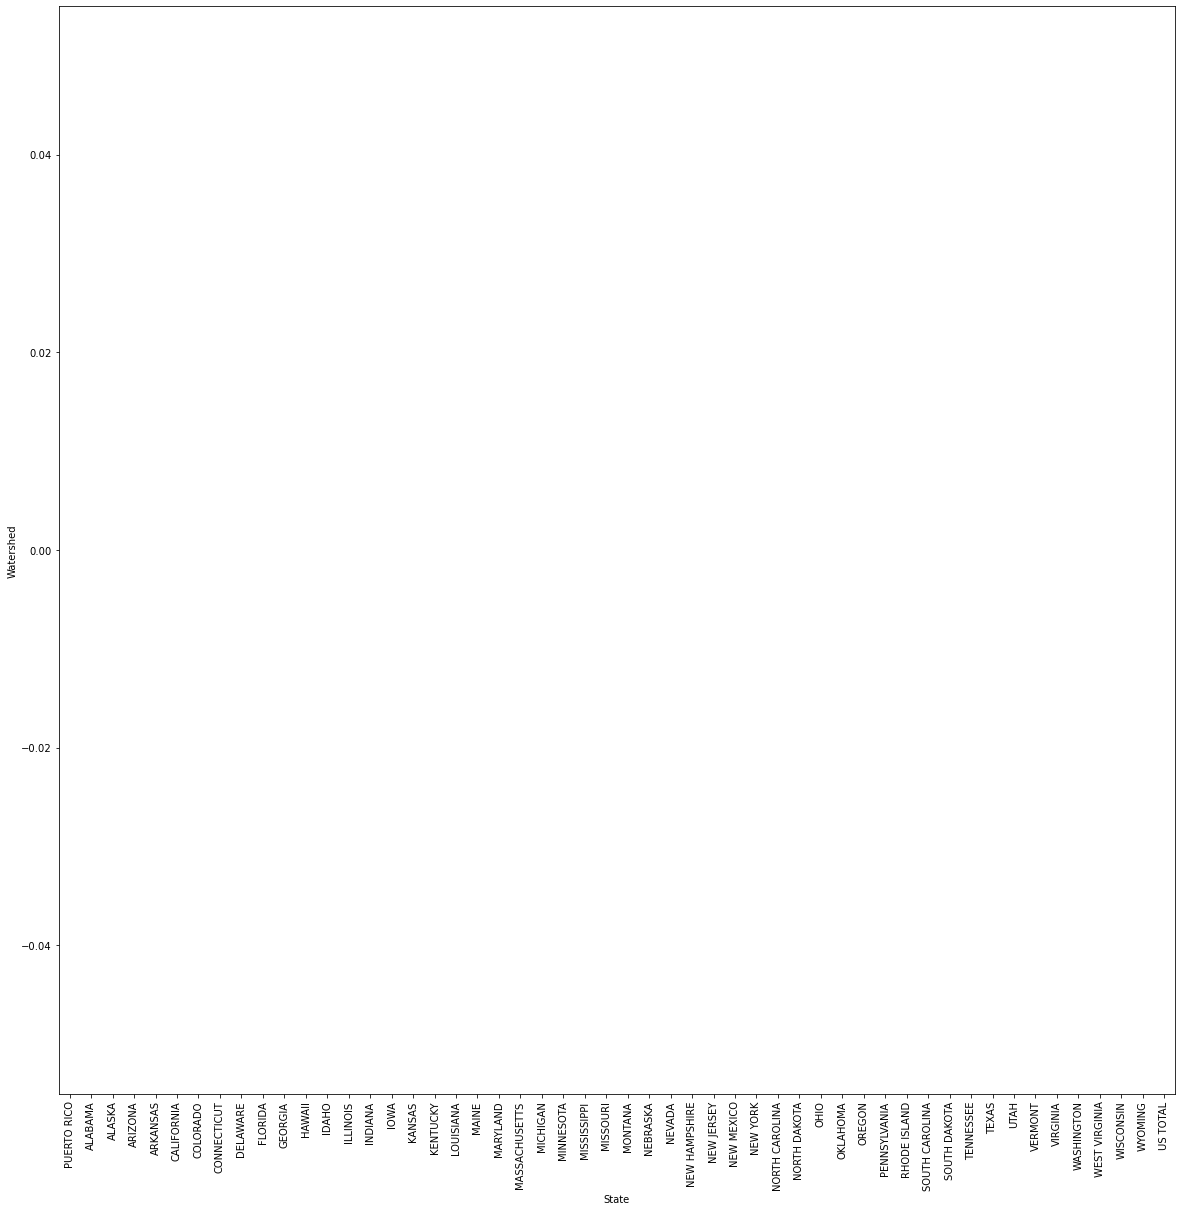

In [40]:
plt.figure(figsize = (20, 20))
sns.barplot(df["State"], df["Watershed"], ci = None)
plt.tick_params(axis='x', rotation=90)

In [38]:
sum_state = df.groupby("State").sum().reset_index()

In [39]:
sum_state

,State,Year,Week Ending,State ANSI,Ag District Code,County ANSI,Zip Code,watershed_code,Watershed
0,ALABAMA,2593650,0.0,1290.0,42680.0,84532.0,0.0,0,0.0
1,ALASKA,180850,0.0,180.0,1220.0,0.0,0.0,0,0.0
2,ARIZONA,611108,0.0,1216.0,14080.0,3926.0,0.0,0,0.0
3,ARKANSAS,2633570,0.0,6550.0,59020.0,97708.0,0.0,0,0.0
4,CALIFORNIA,2404082,0.0,7176.0,58060.0,68534.0,0.0,0,0.0
5,COLORADO,1845756,0.0,7344.0,47980.0,54330.0,0.0,0,0.0
6,CONNECTICUT,409958,0.0,1836.0,1740.0,1366.0,0.0,0,0.0
7,DELAWARE,172822,0.0,860.0,3000.0,180.0,0.0,0,0.0
8,FLORIDA,2806342,0.0,16752.0,63080.0,93890.0,0.0,0,0.0
9,GEORGIA,4983696,0.0,32214.0,120740.0,384108.0,0.0,0,0.0


In [43]:
sum_state = sum_state.sort_values("Ag District Code", ascending = False)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


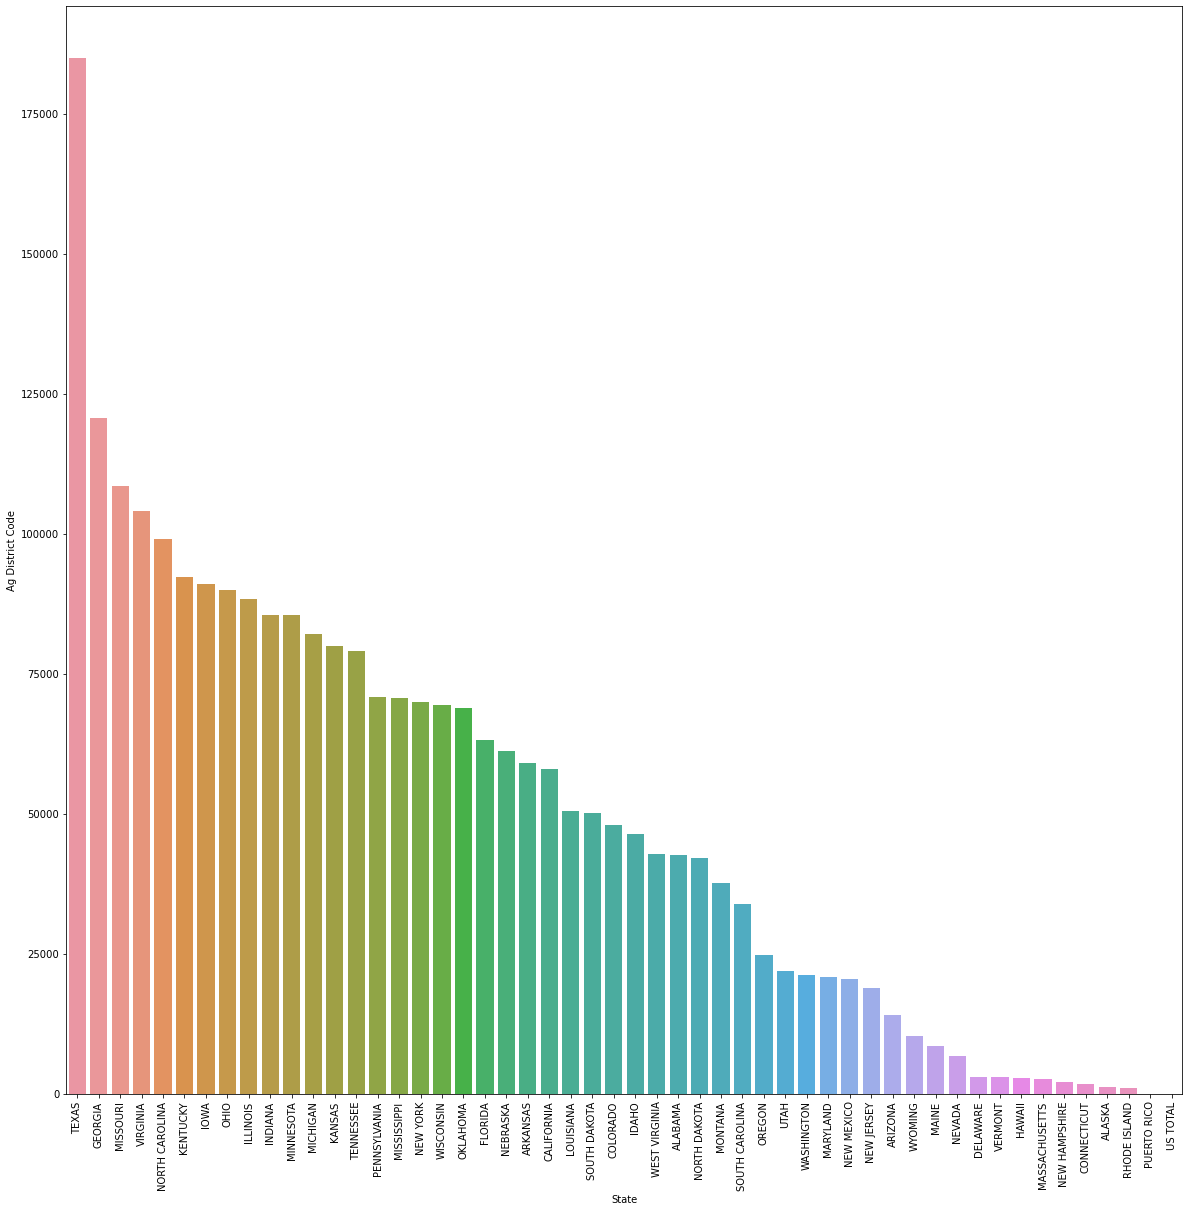

In [45]:
plt.figure(figsize = (20, 20))
sns.barplot(sum_state["State"], sum_state["Ag District Code"], ci = None)
plt.tick_params(axis='x', rotation=90)

### Change in mena average price of Honey from 1995 to 2021

In [60]:
avg_price = df.groupby("State").mean()["Ag District Code"].reset_index()

In [61]:
avg_price

,State,Ag District Code
0,ALABAMA,33.873016
1,ALASKA,19.677419
2,ARIZONA,51.386861
3,ARKANSAS,46.109375
4,CALIFORNIA,49.794168
5,COLORADO,54.031532
6,CONNECTICUT,10.000000
7,DELAWARE,50.000000
8,FLORIDA,46.178624
9,GEORGIA,49.321895


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


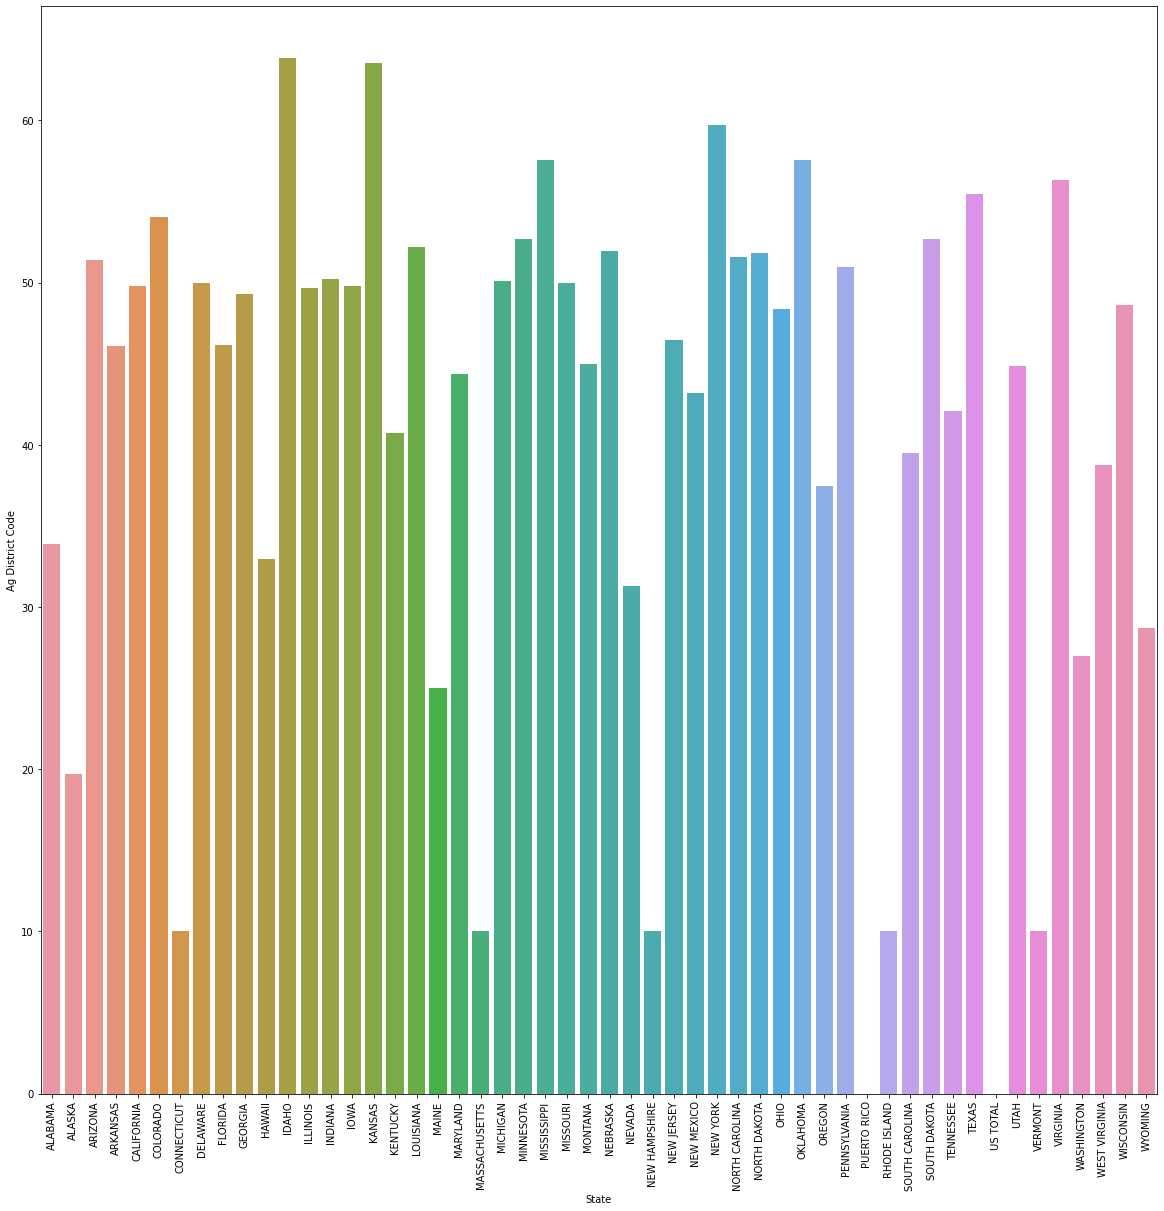

In [62]:
plt.figure(figsize = (20, 20))
sns.barplot(avg_price["State"], avg_price["Ag District Code"], ci = None)
plt.tick_params(axis='x', rotation=90)
plt.show()

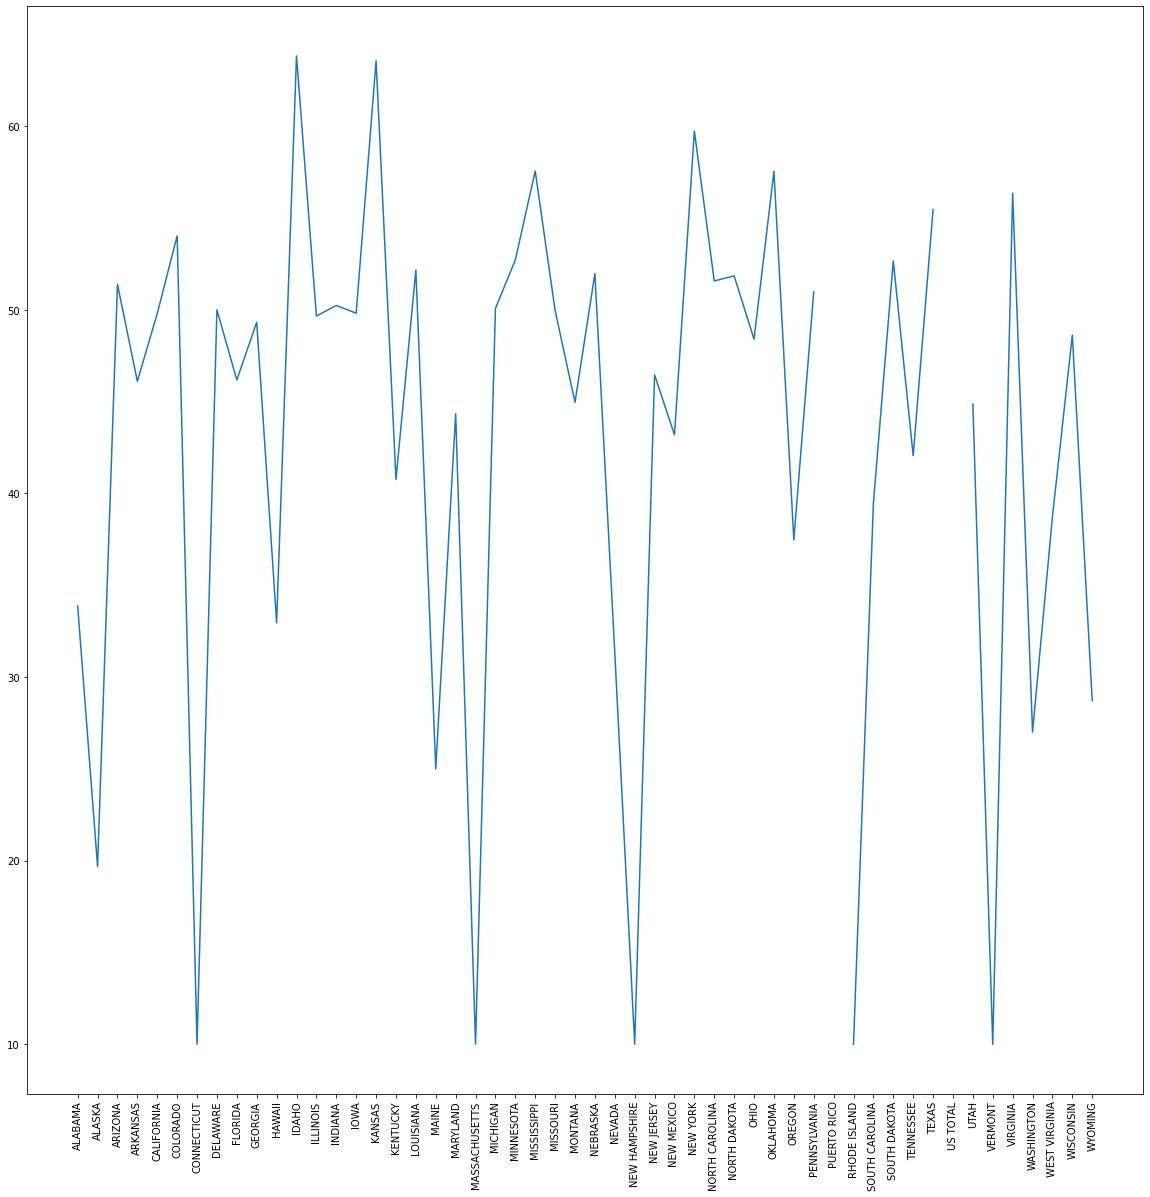

In [63]:
plt.figure(figsize = (20, 20))
plt.plot(avg_price["State"], avg_price["Ag District Code"])
plt.xticks(rotation=90)
plt.show()

In [110]:
# inference:
#     from the year 1995 to 2017 we can see an increasing trend in the avg price of honey but after 2017 the ave price
#     falls sudenly and remains constant tile 2021

### Which year when production of Honey was highest?

In [56]:
high_prod = df.groupby("State").sum()["Ag District Code"].reset_index()

In [57]:
high_prod

,State,Ag District Code
0,ALABAMA,42680.0
1,ALASKA,1220.0
2,ARIZONA,14080.0
3,ARKANSAS,59020.0
4,CALIFORNIA,58060.0
5,COLORADO,47980.0
6,CONNECTICUT,1740.0
7,DELAWARE,3000.0
8,FLORIDA,63080.0
9,GEORGIA,120740.0


### Trend of honey production:

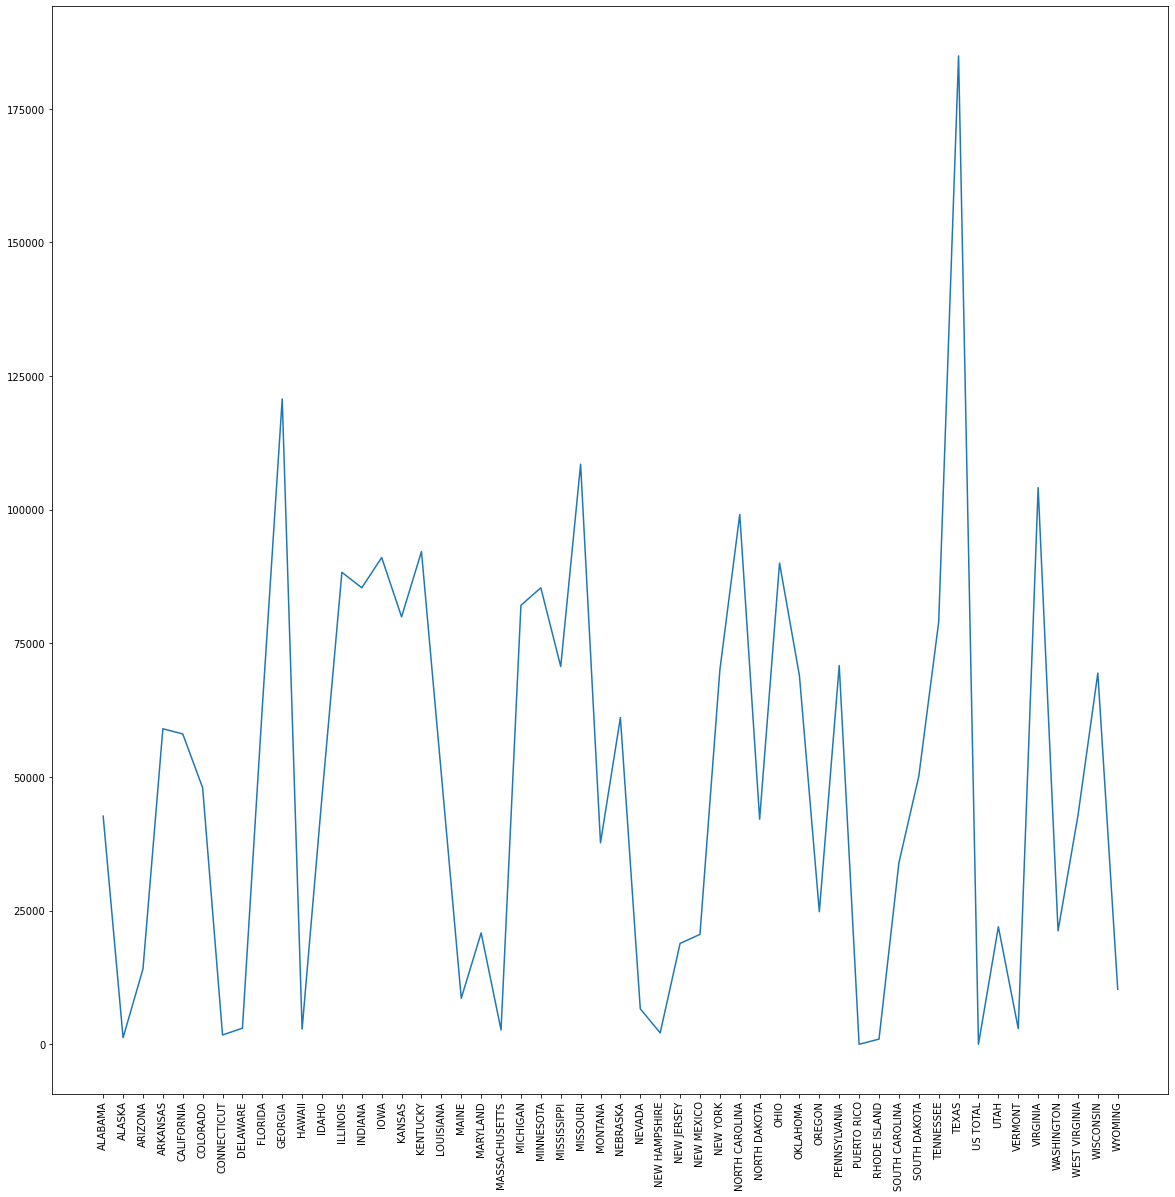

In [58]:
plt.figure(figsize = (20, 20))
plt.plot(high_prod["State"], high_prod["Ag District Code"])
plt.xticks(rotation=90)
plt.show()

In [121]:
# inference : prodcution of Honey decreasing drastically

In [64]:
high_prod = high_prod.sort_values("Ag District Code", ascending = False)

In [65]:
high_prod

,State,Ag District Code
43,TEXAS,184908.0
9,GEORGIA,120740.0
24,MISSOURI,108520.0
47,VIRGINIA,104140.0
32,NORTH CAROLINA,99120.0
16,KENTUCKY,92180.0
14,IOWA,91060.0
34,OHIO,90020.0
12,ILLINOIS,88300.0
13,INDIANA,85400.0


In [126]:
high_prod.idxmax()

year          26
production     5
dtype: int64

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


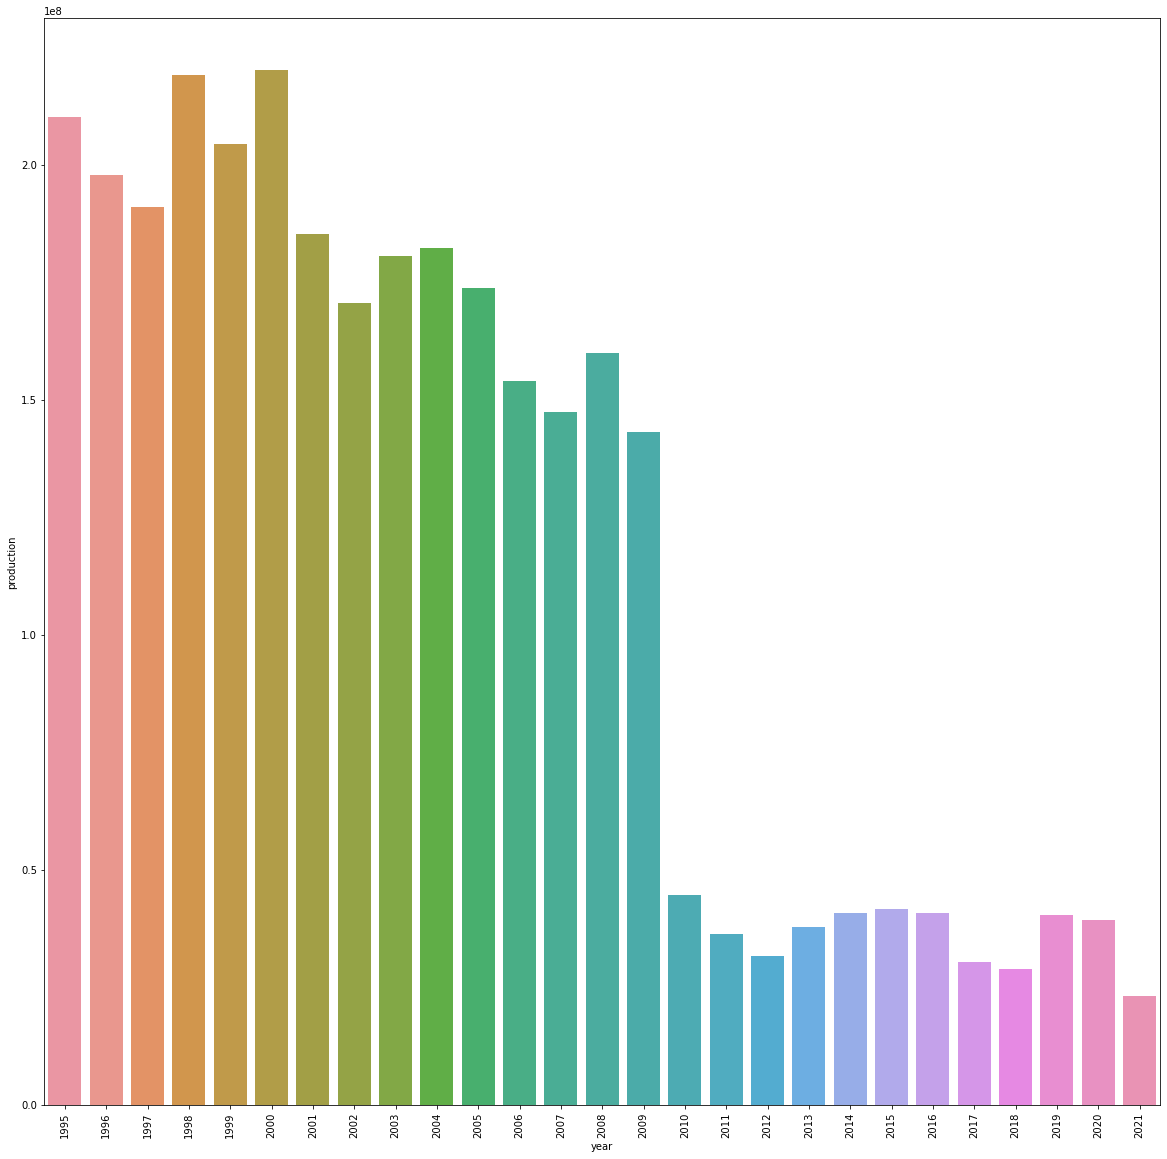

In [127]:
plt.figure(figsize = (20, 20))
sns.barplot(high_prod["year"], high_prod["production"], ci = None)
plt.tick_params(axis='x', rotation=90)
plt.show()

In [128]:
# inference: In year 2000 the production of Honey was highest.

### from the above inference we get the prodcution was highest in the year 2000, now let infer which state having highest contribution in that year.

In [130]:
highprod_state = df[df["year"] == 2000]

In [131]:
highprod_state

,state,colonies_number,yield_per_colony,production,stocks,average_price,value_of_production,year
217,Alabama,16000,78,1248000,187000,59.0,736000,2000
218,Arizona,40000,59,2360000,1322000,73.0,1723000,2000
219,Arkansas,55000,93,5115000,3529000,57.0,2916000,2000
220,California,440000,70,30800000,11396000,58.0,17864000,2000
221,Colorado,29000,60,1740000,957000,62.0,1079000,2000
222,Florida,232000,105,24360000,2923000,54.0,13154000,2000
223,Georgia,55000,57,3135000,376000,63.0,1975000,2000
224,Hawaii,7000,112,784000,125000,81.0,635000,2000
225,Idaho,100000,47,4700000,2679000,52.0,2444000,2000
226,Illinois,8000,61,488000,146000,117.0,571000,2000


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


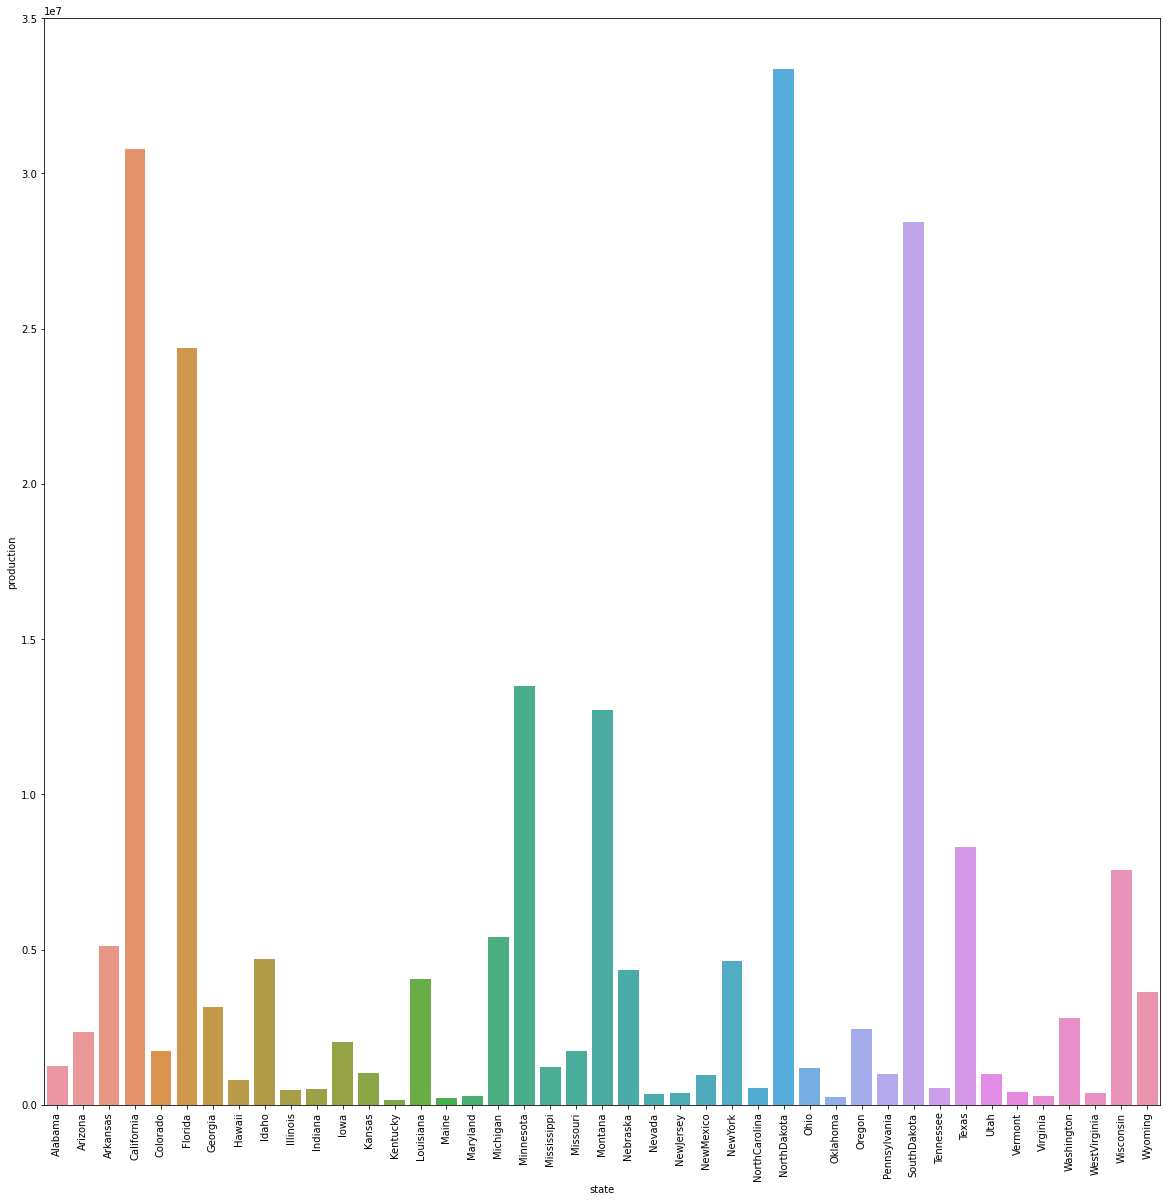

In [133]:
plt.figure(figsize = (20, 20))
sns.barplot(highprod_state["state"], highprod_state["production"], ci = None)
plt.tick_params(axis='x', rotation=90)
plt.show()

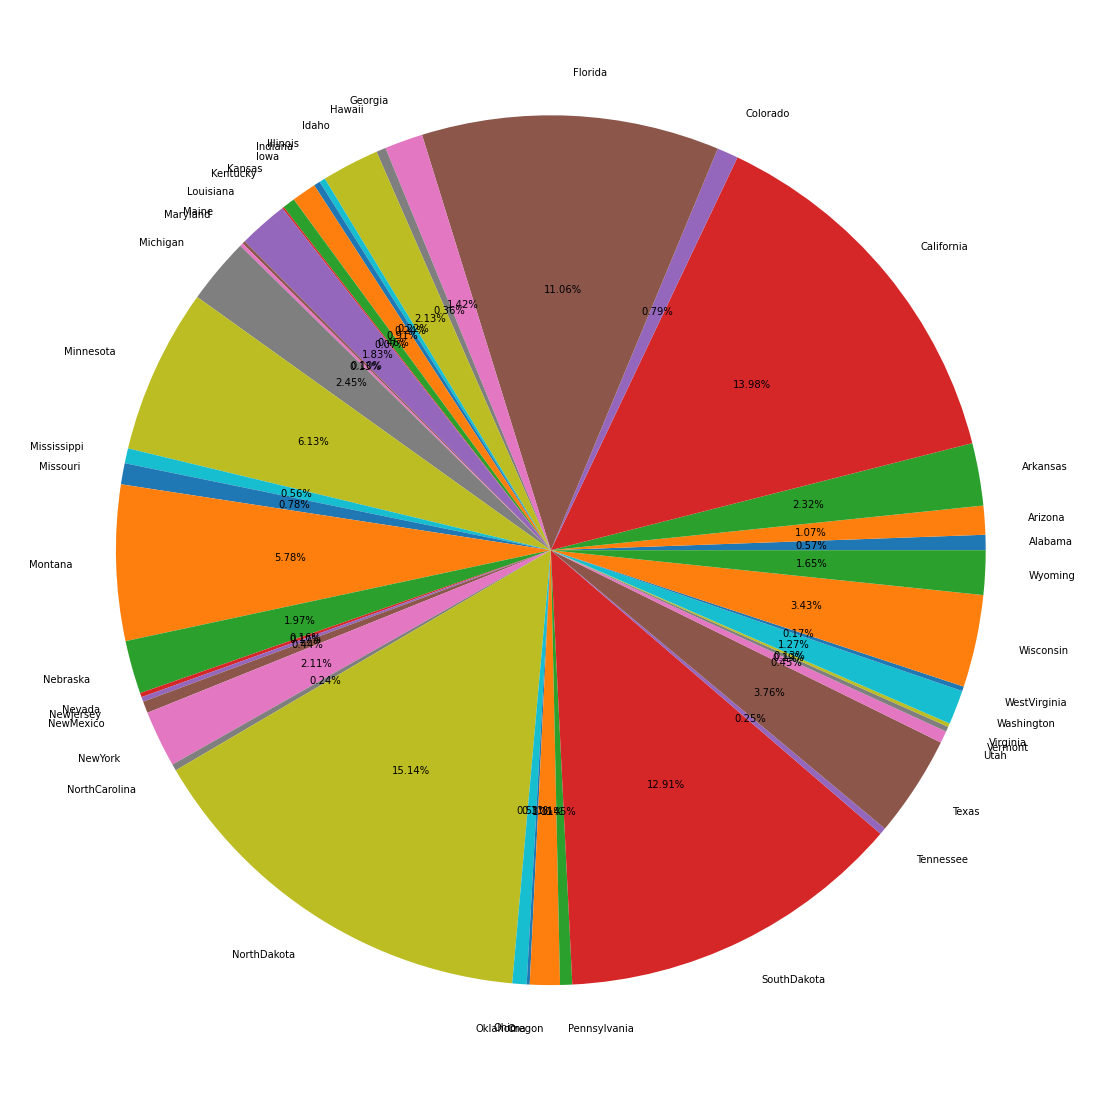

In [142]:
plt.figure(figsize = (20, 20))
plt.pie(highprod_state["production"], labels=highprod_state["state"], autopct = "%1.2f%%")
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


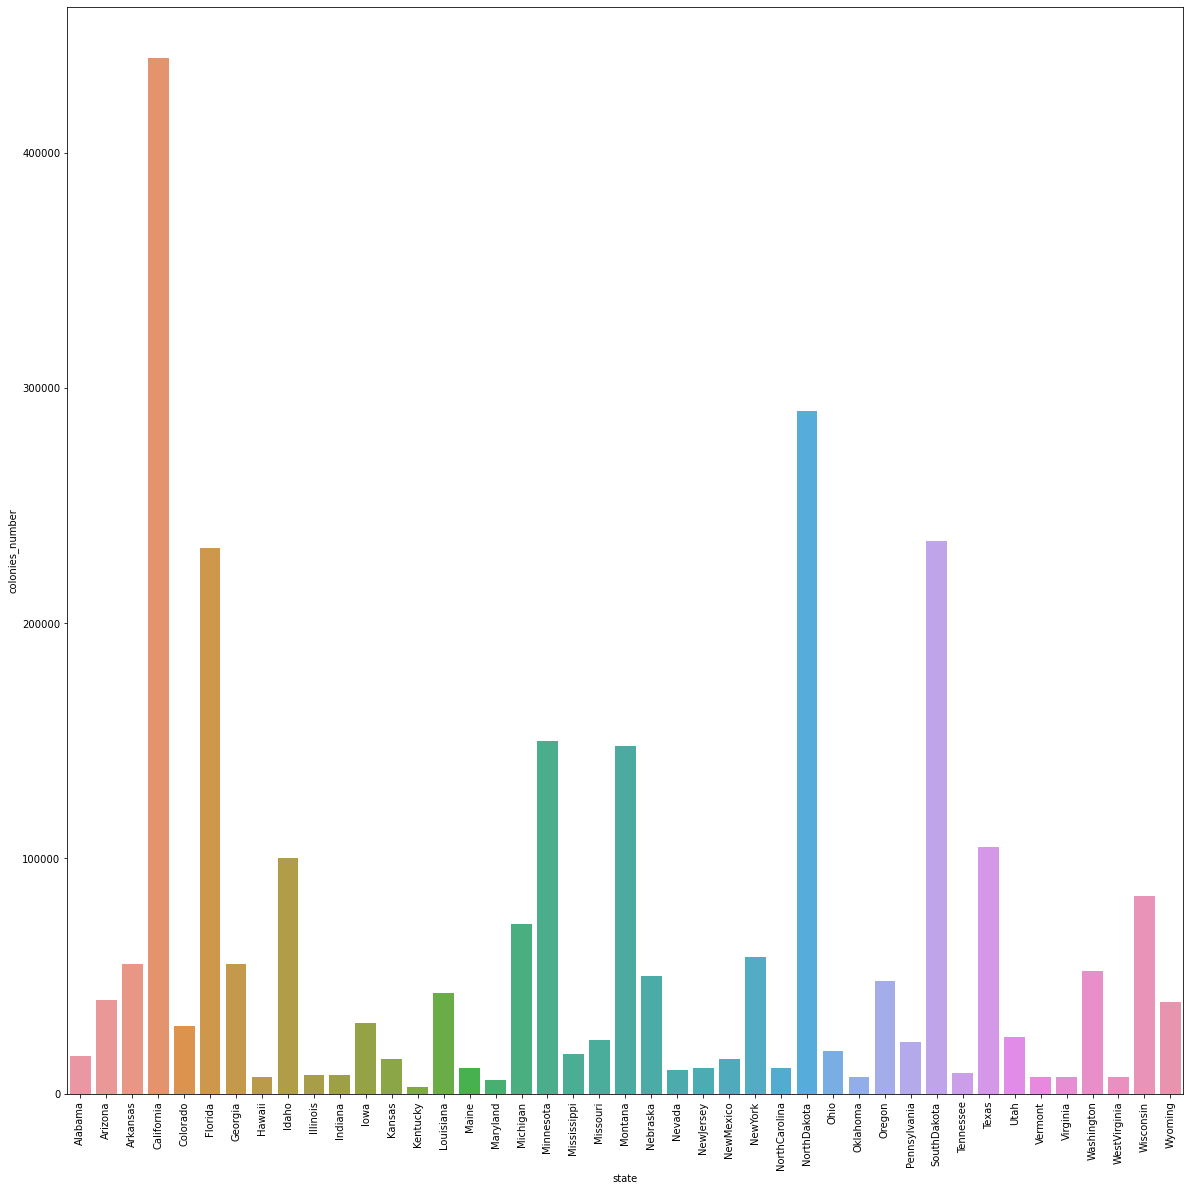

In [143]:
plt.figure(figsize = (20, 20))
sns.barplot(highprod_state["state"], highprod_state["colonies_number"], ci = None)
plt.tick_params(axis='x', rotation=90)
plt.show()

In [144]:
# inference: even the number of colonies are highest in California, still production of honey is highest for North Dakota.